In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
uploaded = files.upload()
# after executing this cell, click on "choose files" below and upload "reporters_cluster.csv" from your local drive

Saving reporters_cluster.csv to reporters_cluster.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['reporters_cluster.csv']))

In [ ]:
df['truthper6'] = df['truthper6']*100
df['truthper8'] = df['truthper8']*100
X = df[['truthper6','truthper8']]


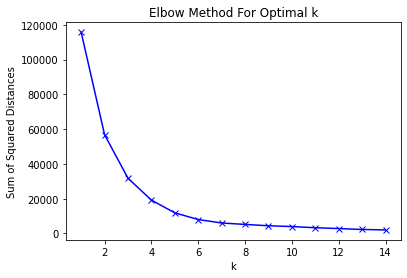

In [ ]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', 
            max_iter=300, n_init=10, verbose=0, random_state=1111)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 4, init='k-means++', 
            max_iter=300, n_init=10, verbose=0, random_state=1111)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
df['cluster'] = labels
#centroids = df.groupby(df.cluster)['truthperexp6', 'truthperexp8'].mean().values
centroids = kmeans.cluster_centers_
print(centroids)
print(df.groupby('cluster').count()['subject'])

[[23.95833333 70.83333333]
 [18.42105263  8.22368421]
 [88.39285714  5.35714286]
 [79.91071429 75.89285714]]
cluster
0     6
1    19
2     7
3    14
Name: subject, dtype: int64


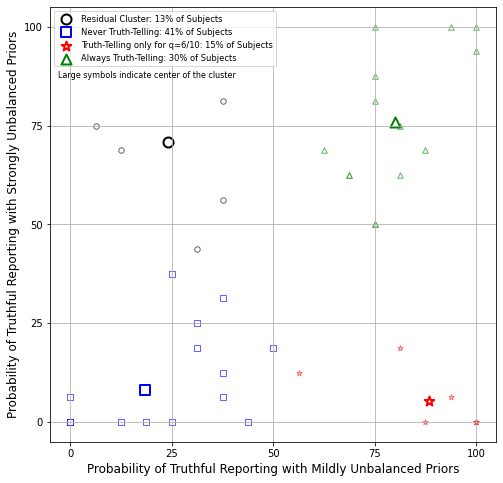

In [ ]:
col = ['black','b', 'r','g']
lab = ['Residual Cluster: 13% of Subjects',
       'Never Truth-Telling: 41% of Subjects', 
       'Truth-Telling only for q=6/10: 15% of Subjects',
       'Always Truth-Telling: 30% of Subjects']
mar = ['o',
       's',
       '*',
       "^"]
fig = plt.figure(figsize=(8,8))

for i in range(4):
    plt.scatter(df[df.cluster==i].truthper6, df[df.cluster==i].truthper8, c = 'white', marker = mar[i], edgecolors=  col[i],  s=30, alpha =.6, label = '_nolabel')
    plt.scatter(centroids[i,0], centroids[i,1], c = 'white', s=100, alpha =1, marker = mar[i], edgecolors=  col[i], linewidths = 2 , label = lab[i])

plt.xlabel('Probability of Truthful Reporting with Mildly Unbalanced Priors',fontsize = 12)
plt.ylabel('Probability of Truthful Reporting with Strongly Unbalanced Priors',fontsize = 12)
plt.axis([-5, 105, -5, 105])
plt.text(-3, 87, 'Large symbols indicate center of the cluster ', fontsize = 8)
plt.legend(loc = 'best', fontsize = 'small')
plt.yticks([0, 25, 50, 75, 100])
plt.xticks([0, 25, 50, 75, 100])
plt.grid(True)
plt.show()
